In [1]:
import torch
import torch.nn as nn

import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
C:\Users\Abcon Budhathoki\anaconda3\envs\tensorflow\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
df =pd.read_csv(r"C:\MLCourse\tourist_arrival_by_month_from_1992_2013.csv")
df.head()


,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Total
0,1992,17451,27489,31505,30682,29089,22469,20942,27338,24839,42647,32341,27561,334353
1,1993,19238,23931,30818,20121,20585,19602,13588,21583,23939,42242,30378,27542,293567
2,1994,21735,24872,31586,27292,26232,22907,19739,27610,27959,39393,28008,29198,326531
3,1995,22207,28240,34219,33994,27843,25650,23980,27686,30569,46845,35782,26380,363395
4,1996,27886,29676,39336,36331,29728,26749,22684,29080,32181,47314,37650,34998,393613


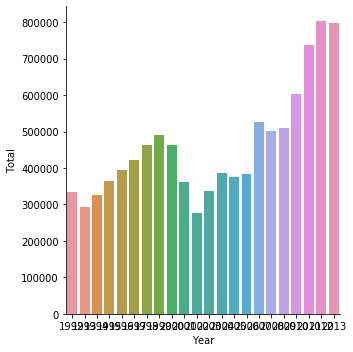

In [3]:
sns.catplot(x="Year", y="Total",  kind="bar", data=df)

In [4]:
df = df.drop(columns = ['Total'])
df.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1992,17451,27489,31505,30682,29089,22469,20942,27338,24839,42647,32341,27561
1,1993,19238,23931,30818,20121,20585,19602,13588,21583,23939,42242,30378,27542
2,1994,21735,24872,31586,27292,26232,22907,19739,27610,27959,39393,28008,29198
3,1995,22207,28240,34219,33994,27843,25650,23980,27686,30569,46845,35782,26380
4,1996,27886,29676,39336,36331,29728,26749,22684,29080,32181,47314,37650,34998


In [5]:
df = df.melt(id_vars=['Year'], var_name ='Month', value_name = 'Tourist').sort_values(by='Year').reset_index(drop=True)
df.tail()



,Year,Month,Tourist
259,2013,Mar,88697
260,2013,Feb,67264
261,2013,Jan,47846
262,2013,Nov,75485
263,2013,Dec,57069


In [6]:
df.shape

(264, 3)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Year     264 non-null    int64 
 1   Month    264 non-null    object
 2   Tourist  264 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 6.3+ KB


In [8]:
df.describe()

,Year,Tourist
count,264.000000,264.000000
mean,2002.500000,38440.666667
std,6.356339,15978.580109
min,1992.000000,13030.000000
25%,1997.000000,27267.250000
50%,2002.500000,35057.000000
75%,2008.000000,45471.500000
max,2013.000000,99426.000000


In [9]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size

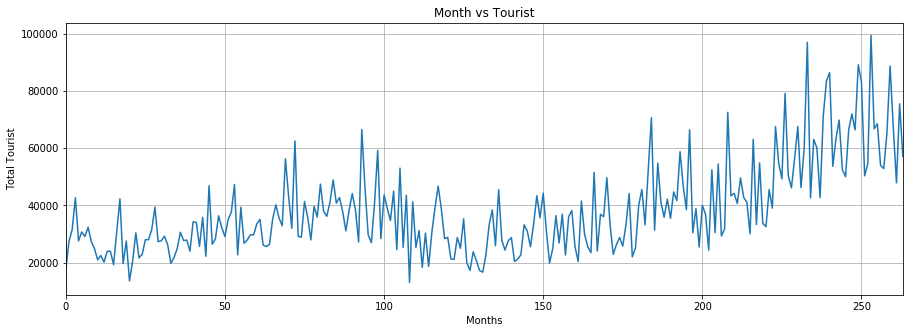

In [10]:
plt.title('Month vs Tourist')
plt.ylabel('Total Tourist')
plt.xlabel('Months')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.plot(df['Tourist'])

In [11]:
df.columns

Index(['Year', 'Month', 'Tourist'], dtype='object')

In [12]:
all_data = df['Tourist'].values.astype(float)

In [13]:
print(all_data)

[17451. 27489. 31505. 42647. 27561. 30682. 29089. 32341. 27338. 24839.
 20942. 22469. 20121. 23939. 23931. 19238. 30818. 42242. 19602. 27542.
 13588. 20585. 30378. 21583. 22907. 27959. 28008. 31586. 39393. 27292.
 27610. 29198. 26232. 19739. 21735. 24872. 30569. 27686. 27843. 23980.
 34219. 33994. 25650. 35782. 22207. 46845. 26380. 28240. 36331. 32181.
 29080. 34998. 37650. 47314. 22684. 39336. 26749. 27886. 29728. 29676.
 33456. 35116. 26091. 25585. 26367. 35229. 40173. 35549. 32861. 56272.
 43177. 31981. 62487. 29181. 28822. 41338. 35814. 27895. 39664. 35863.
 47403. 37956. 36174. 41087. 48865. 40774. 42712. 37698. 31049. 38134.
 44117. 38449. 27193. 66543. 46218. 29752. 26933. 40644. 59195. 28363.
 43635. 38959. 34670. 44944. 24480. 52993. 25307. 43523. 13030. 41245.
 25322. 31170. 18329. 30282. 18588. 30454. 39083. 46709. 38680. 28345.
 28815. 21253. 21093. 28723. 24990. 35272. 19887. 17218. 23752. 20668.
 17176. 16621. 22661. 33115. 38398. 25851. 45459. 27737. 24349. 27568.
 28724

In [14]:
test_data_size = 12

train_data = all_data[:-test_data_size]
test_data = all_data[-test_data_size:]

In [15]:
print(len(train_data))
print(len(test_data))

252
12


In [16]:
print(test_data)

[54599. 99426. 66755. 68478. 54011. 52834. 65152. 88697. 67264. 47846.
 75485. 57069.]


In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
train_data_normalized = scaler.fit_transform(train_data .reshape(-1, 1))

In [18]:
print(train_data_normalized[:5])
print(train_data_normalized[-5:])

[[-0.89469547]
 [-0.65559869]
 [-0.55994093]
 [-0.29454779]
 [-0.65388371]]
[[ 0.40375866]
 [ 0.2708239 ]
 [ 0.81313865]
 [ 0.67074768]
 [-0.1118548 ]]


In [19]:
print(train_data_normalized[:5])
print(train_data_normalized[-5:])

[[-0.89469547]
 [-0.65559869]
 [-0.55994093]
 [-0.29454779]
 [-0.65388371]]
[[ 0.40375866]
 [ 0.2708239 ]
 [ 0.81313865]
 [ 0.67074768]
 [-0.1118548 ]]


In [20]:
train_data_normalized = torch.FloatTensor(train_data_normalized).view(-1)

In [21]:
train_window = 12


In [22]:
def create_inout_sequences(input_data, tw):
    inout_seq = []
    L = len(input_data)
    for i in range(L-tw):
        train_seq = input_data[i:i+tw]
        train_label = input_data[i+tw:i+tw+1]
        inout_seq.append((train_seq ,train_label))
    return inout_seq

In [23]:
train_inout_seq = create_inout_sequences(train_data_normalized, train_window)

In [24]:
train_inout_seq[:5]

[(tensor([-0.8947, -0.6556, -0.5599, -0.2945, -0.6539, -0.5795, -0.6175, -0.5400,
          -0.6592, -0.7187, -0.8115, -0.7752]),
  tensor([-0.8311])),
 (tensor([-0.6556, -0.5599, -0.2945, -0.6539, -0.5795, -0.6175, -0.5400, -0.6592,
          -0.7187, -0.8115, -0.7752, -0.8311]),
  tensor([-0.7402])),
 (tensor([-0.5599, -0.2945, -0.6539, -0.5795, -0.6175, -0.5400, -0.6592, -0.7187,
          -0.8115, -0.7752, -0.8311, -0.7402]),
  tensor([-0.7403])),
 (tensor([-0.2945, -0.6539, -0.5795, -0.6175, -0.5400, -0.6592, -0.7187, -0.8115,
          -0.7752, -0.8311, -0.7402, -0.7403]),
  tensor([-0.8521])),
 (tensor([-0.6539, -0.5795, -0.6175, -0.5400, -0.6592, -0.7187, -0.8115, -0.7752,
          -0.8311, -0.7402, -0.7403, -0.8521]),
  tensor([-0.5763]))]

In [25]:
class LSTM(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=100, output_size=1):
        super().__init__()
        self.hidden_layer_size = hidden_layer_size

        self.lstm = nn.LSTM(input_size, hidden_layer_size)

        self.linear = nn.Linear(hidden_layer_size, output_size)

        self.hidden_cell = (torch.zeros(1,1,self.hidden_layer_size),
                            torch.zeros(1,1,self.hidden_layer_size))

    def forward(self, input_seq):
        lstm_out, self.hidden_cell = self.lstm(input_seq.view(len(input_seq) ,1, -1), self.hidden_cell)
        predictions = self.linear(lstm_out.view(len(input_seq), -1))
        return predictions[-1]

In [26]:
model = LSTM()
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [27]:
print(model)

LSTM(
  (lstm): LSTM(1, 100)
  (linear): Linear(in_features=100, out_features=1, bias=True)
)


In [37]:
epochs = 1000

for i in range(epochs):
    for seq, labels in train_inout_seq:
        optimizer.zero_grad()
        model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size),
                        torch.zeros(1, 1, model.hidden_layer_size))

        y_pred = model(seq)

        single_loss = loss_function(y_pred, labels)
        single_loss.backward()
        optimizer.step()

    if i%25 == 1:
        print(f'epoch: {i:3} loss: {single_loss.item():10.8f}')

print(f'epoch: {i:3} loss: {single_loss.item():10.10f}')

epoch:   1 loss: 0.00076348
epoch:  26 loss: 0.00086649
epoch:  51 loss: 0.00017135
epoch:  76 loss: 0.01222085
epoch: 101 loss: 0.03325332
epoch: 126 loss: 0.00231977
epoch: 151 loss: 0.00051977
epoch: 176 loss: 0.00157647
epoch: 201 loss: 0.00746049
epoch: 226 loss: 0.00090384
epoch: 251 loss: 0.00000002
epoch: 276 loss: 0.00136479
epoch: 301 loss: 0.00000966
epoch: 326 loss: 0.00064784
epoch: 351 loss: 0.00040910
epoch: 376 loss: 0.00199013
epoch: 401 loss: 0.00007429
epoch: 426 loss: 0.00274335
epoch: 451 loss: 0.00000452
epoch: 476 loss: 0.00021653
epoch: 501 loss: 0.00011576
epoch: 526 loss: 0.00011118
epoch: 551 loss: 0.00034309
epoch: 576 loss: 0.00005994
epoch: 601 loss: 0.00097016
epoch: 626 loss: 0.00132929
epoch: 651 loss: 0.00158660
epoch: 676 loss: 0.00149559
epoch: 701 loss: 0.00915626
epoch: 726 loss: 0.00482393
epoch: 751 loss: 0.00023941
epoch: 776 loss: 0.00004366
epoch: 801 loss: 0.00004773
epoch: 826 loss: 0.00005338
epoch: 851 loss: 0.00003474
epoch: 876 loss: 0.0

In [38]:
fut_pred = 12

test_inputs = train_data_normalized[-train_window:].tolist()
print(test_inputs)

[0.7471119165420532, -0.03294190391898155, 0.19843746721744537, 0.35211870074272156, -0.059833742678165436, -0.11952456831932068, 0.2726341485977173, 0.4037586748600006, 0.2708238959312439, 0.8131386637687683, 0.670747697353363, -0.11185479909181595]


In [39]:
model.eval()

for i in range(fut_pred):
    seq = torch.FloatTensor(test_inputs[-train_window:])
    with torch.no_grad():
        model.hidden = (torch.zeros(1, 1, model.hidden_layer_size),
                        torch.zeros(1, 1, model.hidden_layer_size))
        test_inputs.append(model(seq).item())

In [40]:
test_inputs[fut_pred:]

[0.27891403436660767,
 0.3443717360496521,
 0.06359028816223145,
 0.11200925707817078,
 0.38537347316741943,
 0.39480066299438477,
 0.2509581744670868,
 0.19249418377876282,
 0.2719793915748596,
 0.18613234162330627,
 0.15777525305747986,
 0.31801289319992065]

In [41]:
actual_predictions = scaler.inverse_transform(np.array(test_inputs[train_window:] ).reshape(-1, 1))
print(actual_predictions)

[[66722.64790481]
 [69470.75859457]
 [57682.71106791]
 [59715.48463991]
 [71192.13452399]
 [71587.91623449]
 [65548.97703865]
 [63094.48331758]
 [66431.51079649]
 [62827.39409837]
 [61636.87844911]
 [68364.13529521]]


In [42]:
x = np.arange(252, 264, 1)
print(x)

[252 253 254 255 256 257 258 259 260 261 262 263]


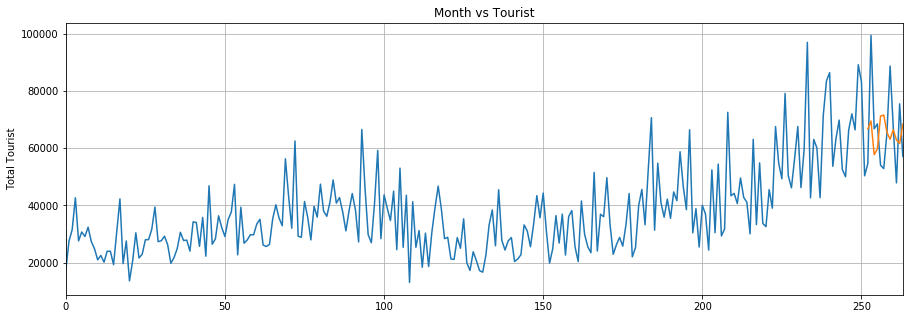

In [43]:
plt.title('Month vs Tourist')
plt.ylabel('Total Tourist')
plt.grid(True)
plt.autoscale(axis='x', tight=True)
plt.plot(df['Tourist'])
plt.plot(x,actual_predictions)
plt.show()

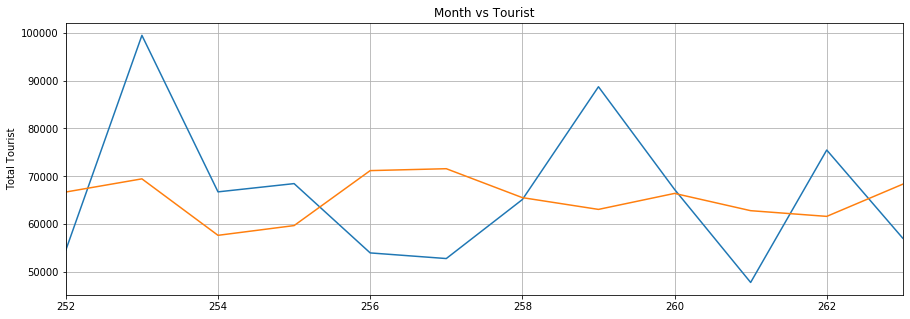

In [44]:
plt.title('Month vs Tourist')
plt.ylabel('Total Tourist')
plt.grid(True)
plt.autoscale(axis='x', tight=True)
plt.plot(df['Tourist'][-train_window:])
plt.plot(x,actual_predictions)
plt.show()